In [1]:
import pandas as pd

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'
sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Arial'})

In [2]:
mds = pd.read_csv('S3a_MDS.tsv', sep='\t')
pheno = pd.read_csv('../data/pheno_final.tsv', sep='\t')

In [3]:
mds = mds.set_index('V1', drop=False)
pheno = pheno.set_index('sample', drop=False)

In [4]:
mds['family'] = pheno.loc[mds.index, 'family']
mds['batch'] = pheno.loc[mds.index, 'batch']
mds['sex'] = pheno.loc[mds.index, 'sex']

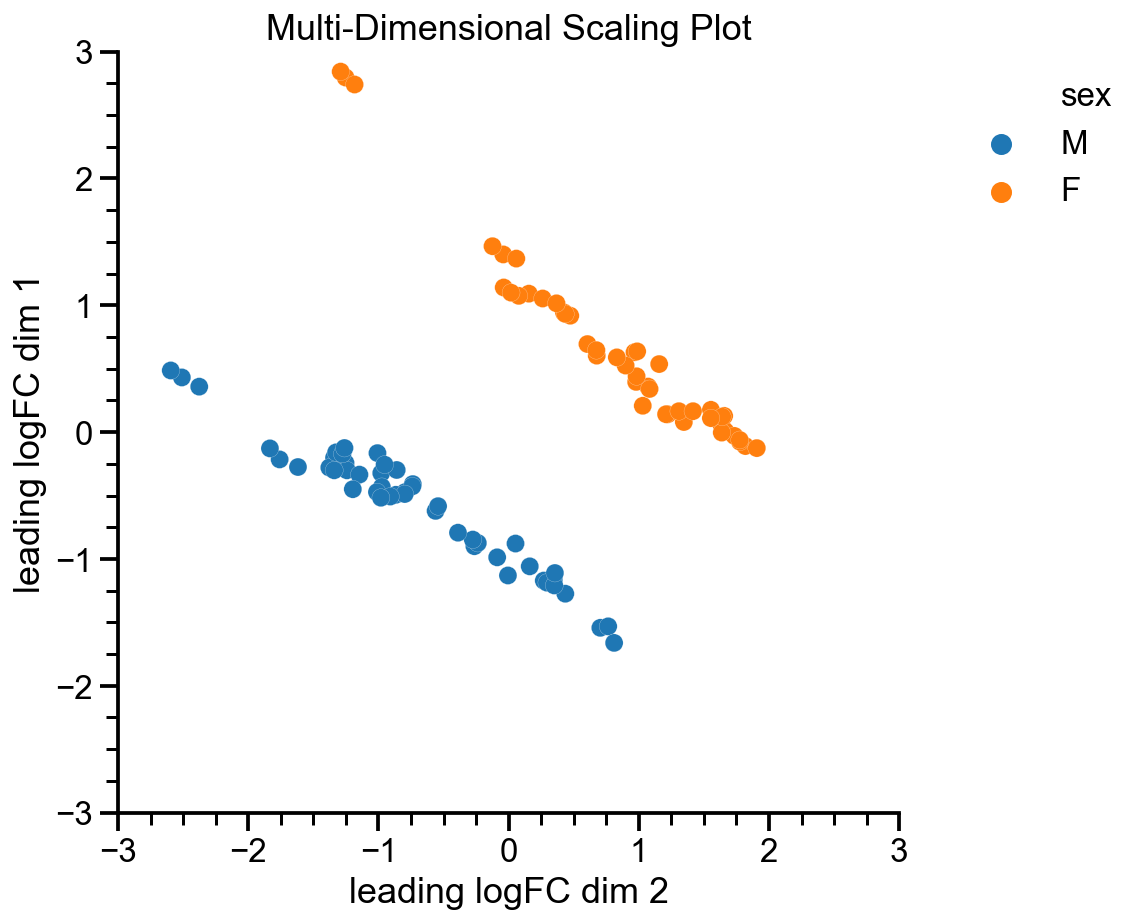

In [5]:
plt.figure(figsize=(7,7))
sns.set_context('talk')

g = sns.scatterplot(
    data=mds, 
    x='V2', 
    y='V3',
    hue='sex',
    linewidth=0.1
)

plt.legend(frameon=False,  bbox_to_anchor=(1.05, 1), loc=2)

g.set_ylabel('leading logFC dim 1')
g.set_xlabel('leading logFC dim 2')
g.set_title('Multi-Dimensional Scaling Plot')

g.set_xlim([-3, 3])
g.set_ylim([-3, 3])

g.get_yaxis().set_major_locator(MultipleLocator(1))
g.get_yaxis().set_minor_locator(MultipleLocator(.25))

g.get_xaxis().set_major_locator(MultipleLocator(1))
g.get_xaxis().set_minor_locator(MultipleLocator(.25))

sns.despine()

# plt.tight_layout()
plt.savefig('figures/S2_MDS.pdf', dpi=300)